MOUNT GOOGLE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORT LIBRARIES

In [ ]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import img_to_array
from keras import utils as np_utils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from imutils import paths

PATHSETTING

In [ ]:
main_dir = '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET'
train_dir = '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN'
test_dir = '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TEST'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/VALIDATION'

train_mask_dir = os.path.join(train_dir,'with_mask')
train_nomask_dir = os.path.join(train_dir,'without_mask')

In [ ]:
imagepath = list(paths.list_images(main_dir))

In [ ]:
imagepath

['/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/with_mask/with_mask.6fbae60a-a8cc-11ec-b212-f5d119801fc2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/with_mask/with_mask.27b4d5d8-a8cd-11ec-8ec8-f5d119801fc2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/with_mask/with_mask.fe5b7d88-a905-11ec-8b93-f5d119801fc2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/with_mask/with_mask.ff9200ec-a905-11ec-9b9b-f5d119801fc2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/with_mask/with_mask.01fffb82-a906-11ec-8f05-f5d119801fc2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/with_mask/with_mask.00c987be-a906-11ec-a8d6-f5d119801fc2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/with_mask/with_mask.0b95a7bd-a8ca-11ec-bbf0-f5d119801fc2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/with_mask/with_mask.1c260727-a917-11ec-9707-f5d

In [ ]:
categories = ['without_mask', 'with_mask']
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))
print(categories)
print(labels)
print(label_dict)

['without_mask', 'with_mask']
[0, 1]
{'without_mask': 0, 'with_mask': 1}


In [ ]:
print("The number of images labelled 'without_mask':",len(os.listdir('/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/without_mask')))
print("The number of images labelled 'with_mask':",len(os.listdir('/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/with_mask')))

The number of images labelled 'without_mask': 142
The number of images labelled 'with_mask': 66


DATA PREPROCESSING

In [ ]:
data = []
labels = []

for category in categories:
    folder_path = os.path.join(train_dir,category)
    print(folder_path)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path,img)
        image = load_img(img_path, target_size=(150,150))
        image = img_to_array(image)
        data.append(image)
        labels.append(category)
    
        

/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/without_mask
/content/drive/MyDrive/Colab Notebooks/FACEMASK DATASET/TRAIN/with_mask


In [ ]:
data

[array([[[ 72.,  88., 104.],
         [ 62.,  74.,  90.],
         [ 82.,  92.,  93.],
         ...,
         [102., 106.,  91.],
         [ 92.,  99.,  83.],
         [ 69.,  77.,  66.]],
 
        [[ 78.,  94., 107.],
         [ 69.,  80.,  98.],
         [ 93., 102., 111.],
         ...,
         [105., 112.,  96.],
         [107., 110., 103.],
         [103., 103., 101.]],
 
        [[159., 162., 171.],
         [ 88.,  85., 114.],
         [123., 127., 130.],
         ...,
         [ 63.,  71.,  56.],
         [ 75.,  78.,  83.],
         [166., 160., 170.]],
 
        ...,
 
        [[ 30.,  27.,   8.],
         [ 30.,  35.,  12.],
         [ 32.,  35.,  16.],
         ...,
         [ 31.,  32.,  24.],
         [ 34.,  31.,  24.],
         [ 31.,  31.,  23.]],
 
        [[ 15.,  12.,   7.],
         [ 15.,  15.,   7.],
         [ 17.,  18.,  12.],
         ...,
         [ 33.,  33.,  25.],
         [ 32.,  32.,  24.],
         [ 30.,  30.,  22.]],
 
        [[ 18.,  19.,  13.],
 

In [ ]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [ ]:
len(data)

208

In [ ]:
len(labels)

208

In [ ]:
image.shape

(150, 150, 3)

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [ ]:
data = np.array(data)
data.shape

(208, 150, 150, 3)

In [ ]:
import random
random.shuffle(data)

In [ ]:
len(data)

208

In [ ]:
len(labels)

208

DATA AUGMENTATION

In [ ]:
train_aug = ImageDataGenerator(rescale=1/255,
                               rotation_range=20, 
                               zoom_range=0.15,
                               width_shift_range=0.2, 
                               height_shift_range=0.2, 
                               shear_range=0.15, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

test_aug = ImageDataGenerator(rescale=1/255)
validation_aug = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_aug.flow_from_directory(train_dir,
                                             target_size=(150,150),
                                             color_mode='rgb',
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle='True'
                                             )
test_generator = test_aug.flow_from_directory(test_dir,
                                             target_size=(150,150),
                                             color_mode='rgb',
                                             batch_size=16,
                                             class_mode='binary',
                                             shuffle='True'
                                             )

validation_generator = validation_aug.flow_from_directory(validation_dir,
                                             target_size=(150,150),
                                             color_mode='rgb',
                                             batch_size=16,
                                             class_mode='binary',
                                             shuffle='True')

Found 207 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

CNN MODEL

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [ ]:
from keras import optimizers
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, 
                    batch_size = 16,
                    epochs = 350,
                    validation_data = validation_generator)

Epoch 1/350
7/7 [==============================] - 38s 6s/step - loss: 8.5801 - accuracy: 0.5459 - val_loss: 0.9163 - val_accuracy: 0.4930
Epoch 2/350
7/7 [==============================] - 16s 2s/step - loss: 1.2931 - accuracy: 0.6957 - val_loss: 0.6933 - val_accuracy: 0.3944
Epoch 3/350
7/7 [==============================] - 16s 2s/step - loss: 0.6809 - accuracy: 0.5990 - val_loss: 0.6931 - val_accuracy: 0.4930
Epoch 4/350
7/7 [==============================] - 16s 2s/step - loss: 0.6604 - accuracy: 0.6570 - val_loss: 0.6839 - val_accuracy: 0.4930
Epoch 5/350
7/7 [==============================] - 16s 2s/step - loss: 0.6355 - accuracy: 0.6812 - val_loss: 0.6851 - val_accuracy: 0.4930
Epoch 6/350
7/7 [==============================] - 16s 2s/step - loss: 0.6224 - accuracy: 0.6812 - val_loss: 0.6883 - val_accuracy: 0.4930
Epoch 7/350
7/7 [==============================] - 15s 2s/step - loss: 0.6391 - accuracy: 0.6812 - val_loss: 0.6886 - val_accuracy: 0.4930
Epoch 8/350
7/7 [==========

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/adam__model.h5')

In [ ]:
history.history

{'accuracy': [0.5458937287330627,
  0.695652186870575,
  0.5990338325500488,
  0.6570048332214355,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6763284802436829,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6811594367027283,
  0.6859903335571289,
  0.6714975833892822,
  0.6859903335571289,
  0.6763284802436829,
  0.6859903335571289,
  0.6811594367027283,
  0.6811594367027283,
  0.6908212304115295,
  0.6811594367027283,
  0.6811594367027283,
  0.6714975833892822,
  0.6908212304115295,
  0.6811594367027283,
  0.7101449370384216,
  0.6666666865348816,
  0.7004830837249756,
  0.6763284802436829,
  0.729468584060669,


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

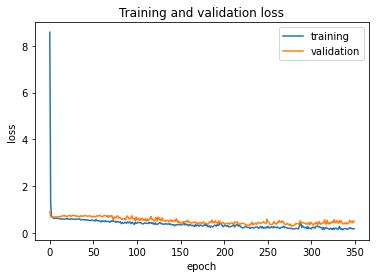

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

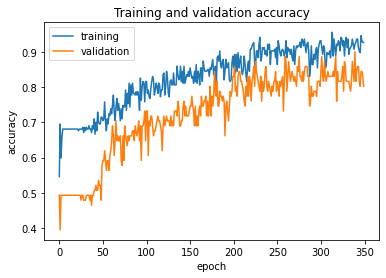

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

5/5 [==============================] - 19s 5s/step - loss: 1.2694 - accuracy: 0.8429
test loss:1.2694058418273926 test acc:0.8428571224212646


Out of four 1's, 3 are predicted correctly and out of six 0's 4 are predicted correctly.

Note: Actual as Rows and Predicted as columns

In [ ]:
from sklearn.metrics import confusion_matrix
expected = [1,1,0,1,0,0,1,0,0,0]
predicted = [1,0,0,1,0,0,1,1,1,0]
cf =confusion_matrix(expected,predicted)
cf


array([[4, 2],
       [1, 3]])

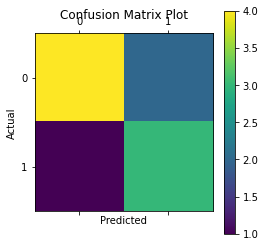

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [ ]:
print('Precision: %.3f' % precision_score(expected, predicted))
print('Recall: %.3f' % recall_score(expected, predicted))
print('Accuracy: %.3f' % accuracy_score(expected, predicted))
print('F1 Score: %.3f' % f1_score(expected, predicted))

Precision: 0.600
Recall: 0.750
Accuracy: 0.700
F1 Score: 0.667


In [ ]:
saved_model = tf.keras.models.load_model(
    '/content/drive/MyDrive/Colab Notebooks/adamax__model.h5')
saved_model.summary()

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib as img
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  plt.imshow(img)
  if prediction == 0:
    print('without_Mask')
  else:
    print('with_Mask')  

Saving 2264.png to 2264.png
2264.png
with_Mask
